## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

## Import and clean the data

In [3]:
#folder path
path=r'C:\Users\oluwo\Downloads\Gun Violence Project Analysis 2025'

In [4]:
df= pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'gun_violence_cleaned.csv'), index_col=False)

In [5]:
df.shape

(239677, 20)

In [6]:
df.head(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,source_url,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,notes,participant_age_group,participant_gender,participant_status,participant_type
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.post-gazette.com/local/south/2013/0...,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.dailybulletin.com/article/zz/201301...,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://chronicle.northcoastnow.com/2013/02/14/...,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.dailydemocrat.com/20130106/aurora-s...,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.journalnow.com/news/local/article_d...,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2,Two firearms recovered. (Attempted) murder sui...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [7]:
#drop the column with 'unnamed:0'df.drop(columns=["Unnamed: 0"])
df = df.drop(columns=["Unnamed: 0"]) 

In [8]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,source_url,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,notes,participant_age_group,participant_gender,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.post-gazette.com/local/south/2013/0...,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.dailybulletin.com/article/zz/201301...,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://chronicle.northcoastnow.com/2013/02/14/...,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.dailydemocrat.com/20130106/aurora-s...,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1,Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.journalnow.com/news/local/article_d...,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2,Two firearms recovered. (Attempted) murder sui...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [9]:
df.shape

(239677, 19)

In [10]:
#check the descriptive statistics 
df.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved
count,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,37.554747,-89.319724,1.217902
std,2.931287e+05,0.521779,0.729952,5.132741,14.333861,3.583024
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,1.000000
25%,3.085450e+05,0.000000,0.000000,33.911900,-94.118100,1.000000
50%,5.435870e+05,0.000000,0.000000,38.587100,-86.248400,1.000000
75%,8.172280e+05,0.000000,1.000000,41.448000,-80.052000,1.000000
max,1.083472e+06,50.000000,53.000000,71.336800,97.433100,400.000000


In [11]:
#create a subset that has only the numerical variables
df_2= df[['n_killed', 'n_injured', 'n_guns_involved']]

In [12]:
df_2

,n_killed,n_injured,n_guns_involved
0,0,4,1
1,1,3,1
2,1,3,2
3,4,0,1
4,2,2,2
...,...,...,...
239672,0,0,1
239673,1,0,1
239674,0,1,1
239675,1,0,1


## 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3269935.0679047005,
 -1356765.070579246,
 -749880.2631379091,
 -486048.6393632723,
 -425672.98265143536,
 -305059.3385222891,
 -263775.50747109647,
 -207415.9205718958,
 -191178.44188467177]

## 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.  
## Explain why you chose that number in a markdown cell.  

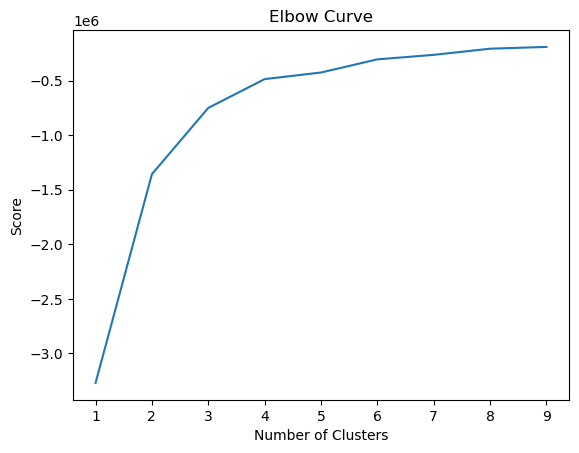

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve above, the optimal number of clusters is 3.   
There is a clear transition from a steep improvement to a flatter trend at k = 3, indicating diminishing returns beyond this point.  
While the curve continues to flatten slightly at k = 4, the improvement is weaker compared to k = 3, making three clusters the strongest choice.

## 5. Run the k-means algorithm.

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


## 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [18]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\oluwo\AppData\Local\Temp\ipykernel_19124\1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [19]:
#check reesult
df_2.head()

,n_killed,n_injured,n_guns_involved,clusters
0,0,4,1,0
1,1,3,1,0
2,1,3,2,0
3,4,0,1,0
4,2,2,2,0


In [20]:
#check cluster count
df_2['clusters'].value_counts()

clusters
0    239136
2       519
1        22
Name: count, dtype: int64

## 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

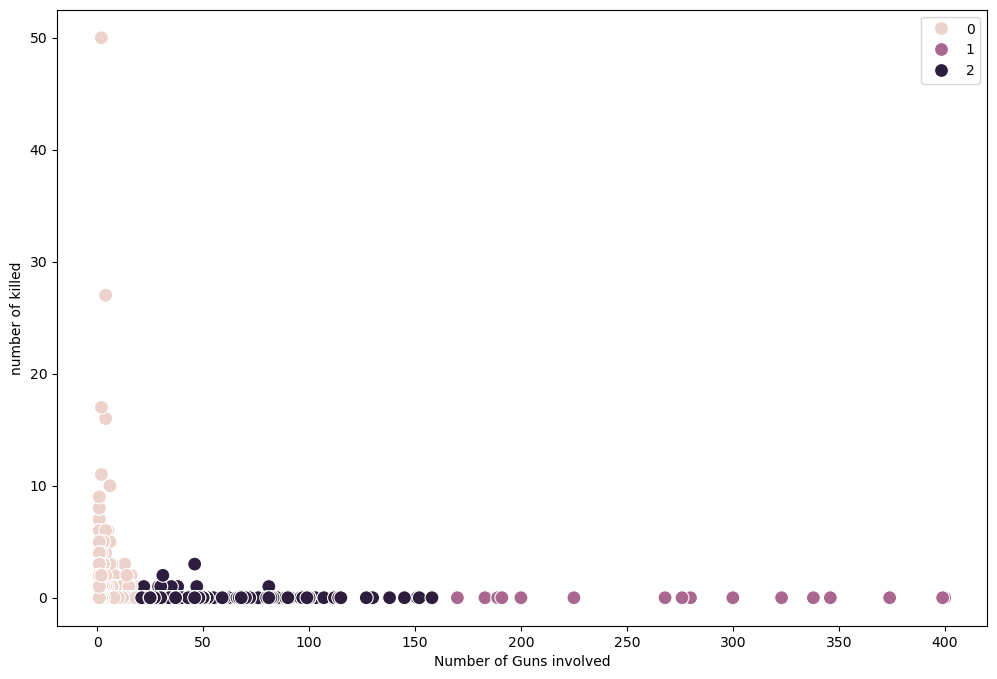

In [21]:
# Plot the clusters for the "n_killed " and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['n_guns_involved'], y=df_2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns involved') # Label x-axis.
plt.ylabel('number of killed') # Label y-axis.
plt.show()

The plot shows that the deadliest incidents occur with only a few guns involved, while events involving many guns rarely result in fatalities. One cluster captures low gun-count incidents with high death tolls, representing the most severe shootings, while the other clusters reflect mid to high gun-count events with little or no loss of life, likely tied to seizures or non-shooting incidents.   
Overall, the results highlight that the number of guns involved does not determine the severity of incidents.

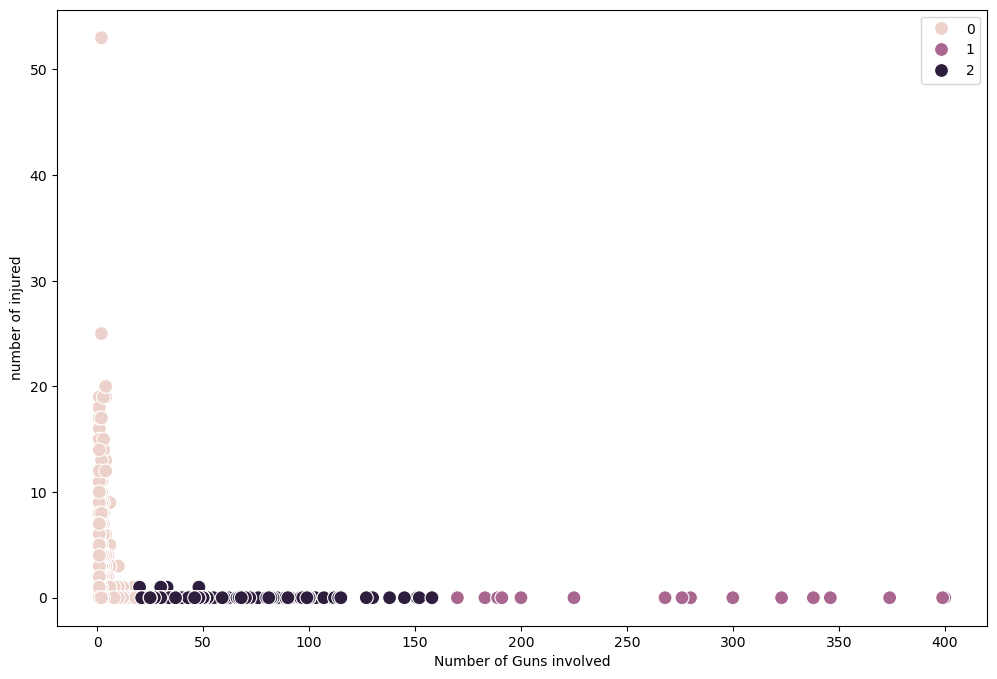

In [22]:
# Plot the clusters for the "n_injured " and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['n_guns_involved'], y=df_2['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns involved') # Label x-axis.
plt.ylabel('number of injured') # Label y-axis.
plt.show()

The plot shows that most injuries occur in incidents involving only a few guns, while incidents with many guns usually result in little or no injury. Pink cluster captures low gun count events with high injuries, likely representing actual shootings, while the other clusters represent mid to high gun count incidents with few or no injuries, likely tied to gun seizures or recoveries. Overall, the results suggest that higher gun counts do not translate into higher injury levels.

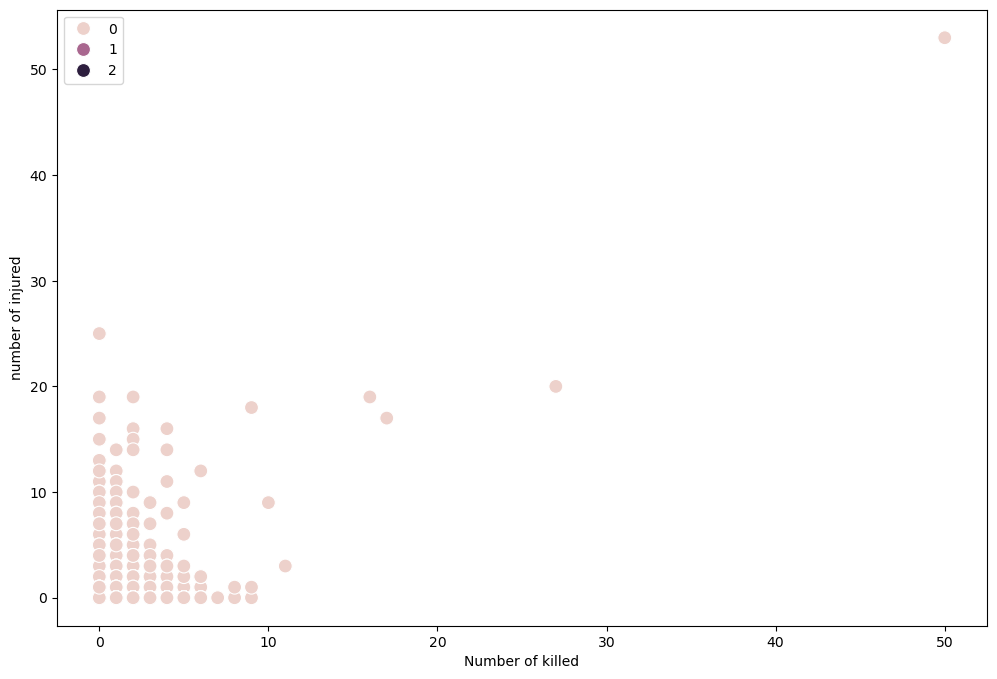

In [23]:
# Plot the clusters for the "n_injured " and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['n_killed'], y=df_2['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of killed') # Label x-axis.
plt.ylabel('number of injured') # Label y-axis.
plt.show()

The scatter shows that most incidents cluster near the origin, indicating that gun violence events typically involve few or no deaths and low injury counts.  
A small, separate cluster captures rare high-casualty incidents, but this separation is driven largely by extreme outliers.  
Overall, the fact that clusters are dominated by extreme values is itself an important insight, indicating that the data contains fundamentally different incident types that should not be modeled together without segmentation.

In [24]:
#Total_victims= n_killed + n_injured.  
df_2['total_victims'] = df_2['n_killed'] + df_2['n_injured'] 

C:\Users\oluwo\AppData\Local\Temp\ipykernel_19124\773991426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['total_victims'] = df_2['n_killed'] + df_2['n_injured']


In [25]:
df_2.head()

,n_killed,n_injured,n_guns_involved,clusters,total_victims
0,0,4,1,0,4
1,1,3,1,0,4
2,1,3,2,0,4
3,4,0,1,0,4
4,2,2,2,0,4


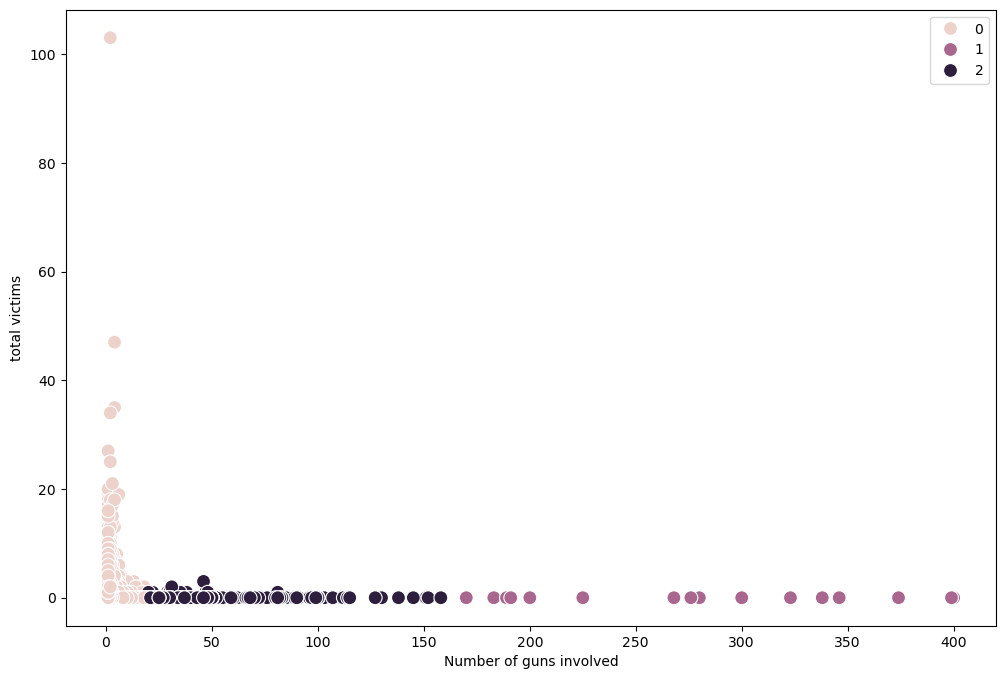

In [26]:
# Plot the clusters for the "n_guns_involved " and "total_victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['n_guns_involved'], y=df_2['total_victims'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of guns involved') # Label x-axis.
plt.ylabel('total victims') # Label y-axis.
plt.show()

Cluster 0 = Pink    
This cluster contains incidents with very few guns involved but a wide range of victim counts, including the most severe outliers.  
These represent high-impact shooting events, such as mass shootings, where a single or small number of firearms led to many casualties.
This cluster makes conceptual sense and aligns with real-world patterns.

Cluster 1 = Purple     
The cluster with the highest number of guns involved and almost no victims, further supports the idea that gun count does not directly translate to harm.  
These incidents likely reflect enforcement or inventory-related events rather than violent encounters.

Cluster 2 = Dark Purple     
Incidents in this cluster involve a moderate number of guns but consistently low victim counts.   
These are likely non-shooting incidents, such as gun possession cases, seizures, or recoveries, where many firearms are recorded without resulting in injuries or deaths.  

While K-means successfully separates incidents based on scale and outcome, the clusters reveal that the number of guns involved alone is not a strong driver of victim severity.   
Instead, the clusters expose distinct incident types embedded in the data.

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [27]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\oluwo\AppData\Local\Temp\ipykernel_19124\312944784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'


In [28]:
df_2.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median'],
                          'total_victims':['mean', 'median']})

n_killed        n_injured        n_guns_involved         \
                 mean median      mean median            mean median   
cluster                                                                
dark purple  0.023121    0.0  0.011561    0.0       36.244701   29.0   
pink         0.252810    0.0  0.495099    0.0        1.114972    1.0   
purple       0.000000    0.0  0.000000    0.0      293.727273  300.0   

            total_victims         
                     mean median  
cluster                           
dark purple      0.034682    0.0  
pink             0.747909    1.0  
purple           0.000000    0.0

**Dark purple cluster** (Multi-gun, low-victim incidents)    
This cluster includes incidents involving a large number of firearms, with an average of about 36 guns per event, yet almost no associated victims. Killings and injuries are minimal, with median values of zero across all victim measures. These patterns suggest that the cluster primarily represents non-shooting events, such as gun recoveries, seizures, or possession cases, where multiple firearms are present without violence.

**Pink cluster** (Typical low-severity incidents)     
This cluster represents the most common type of incident in the dataset. Victim counts are generally very low, with an average of fewer than one victim per incident and median values of zero or one for killed, injured, and total victims. The number of guns involved is also minimal, usually one firearm per incident. Overall, these events reflect everyday gun incidents that result in few or no casualties.

**Purple cluster** (Extreme gun-count outliers)    
This small cluster consists of rare incidents with extremely high numbers of firearms involved, averaging nearly 300 guns per event. Despite the large gun counts, these incidents result in no victims, with both mean and median values of zero for all victim metrics. These outlier events heavily influence the clustering results but do not represent typical patterns of gun violence

## 10. Propose what these results could be useful for in future steps of an analytics pipeline.

These clustering results help break the data into clear types of incidents, such as common low-severity events, multi-gun cases with no victims, and rare extreme outliers. This separation makes it easier to reduce data skew, create better features, and build models that focus on specific incident groups. Overall, the clusters give a stronger and clearer foundation for future analysis of gun violence patterns.

In [32]:
df_3 = df_2.join(df[['date', 'state']])

In [33]:
df_3.head()

,n_killed,n_injured,n_guns_involved,clusters,total_victims,cluster,date,state
0,0,4,1,0,4,pink,2013-01-01,Pennsylvania
1,1,3,1,0,4,pink,2013-01-01,California
2,1,3,2,0,4,pink,2013-01-01,Ohio
3,4,0,1,0,4,pink,2013-01-05,Colorado
4,2,2,2,0,4,pink,2013-01-07,North Carolina


In [47]:
# Count incidents per date
incident_counts_by_date = df.groupby('date')['incident_id'].count().reset_index()
incident_counts_by_date.rename(columns={'incident_id': 'incident_count'}, inplace=True)

In [48]:
df_4 = df_3.merge(incident_counts_by_date, on='date', how='left')

In [49]:
df_4.head()

,n_killed,n_injured,n_guns_involved,clusters,total_victims,cluster,date,state,incident_count_x,incident_count_y
0,0,4,1,0,4,pink,2013-01-01,Pennsylvania,3,3
1,1,3,1,0,4,pink,2013-01-01,California,3,3
2,1,3,2,0,4,pink,2013-01-01,Ohio,3,3
3,4,0,1,0,4,pink,2013-01-05,Colorado,1,1
4,2,2,2,0,4,pink,2013-01-07,North Carolina,2,2


In [51]:
# Keep the new incident_count and drop the old
df_4 = df_4.drop(columns=['incident_count_x'])
df_4.rename(columns={'incident_count_y': 'incident_count'}, inplace=True)

In [53]:
df_4.head()

,n_killed,n_injured,n_guns_involved,clusters,total_victims,cluster,date,state,incident_count
0,0,4,1,0,4,pink,2013-01-01,Pennsylvania,3
1,1,3,1,0,4,pink,2013-01-01,California,3
2,1,3,2,0,4,pink,2013-01-01,Ohio,3
3,4,0,1,0,4,pink,2013-01-05,Colorado,1
4,2,2,2,0,4,pink,2013-01-07,North Carolina,2


In [34]:
#export the clean dataframe
df_3.to_csv(os.path.join(path, '02. Data','Prepared Data', 'gun_data.csv'))

In [54]:
df_4.to_csv(os.path.join(path, '02. Data','Prepared Data', 'gun_data_2.csv'))